# 1. Problema: ***Árbol binario de búsqueda óptimo***

La búsqueda en un árbol binario de búsqueda consiste en acceder a la raíz del árbol, si el elemento a localizar coincide con éste la búsqueda ha concluido con éxito, si el elemento es menor se busca en el subárbol izquierdo y si es mayor en el derecho.


**Entrada**: Entrada: Secuencia ordenada de n claves: $K=\left(k_1,k_2,...,k_n\right)$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$


**Salida:** Construir un árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado).



# 2. Descripcion del algoritmo

## 2.1 Codigo


In [ ]:
import random
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np


In [ ]:
null_node = 0
def generar_bst(t,a):

    global null_node
    if len(a)==1: 
      T.add_node(a[0])
      return a[0]
    else:
      pivote = random.randint(0,len(a)-1)
      T.add_node(a[pivote])

      if pivote > 0:
        left_node = generar_bst(T,a[0:pivote])
        T.add_edge(a[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(a[pivote],"nil"+str(null_node)); null_node += 1
      
      if pivote < len(a)-1:
        right_node = generar_bst(t,a[pivote+1:])
        T.add_edge(a[pivote],right_node)
      else: 
        T.add_edge(a[pivote],"nil"+str(null_node)); null_node +=1

      return a[pivote]

### Forma Recursiva

In [ ]:
llamadas = 0

def BST_recursivo(frec, i, j, verbose):

  global llamadas                                                
  if j < i:                                                        
      return 0
  if j == i:     
    return frec[i]
  aux = 0                                                           
  for k in range(i, j + 1):
    aux += frec[k]
  if verbose:
    print("SUMA DE LAS FRECUANCIAS:", aux)   
  min = float("inf")                                                    
  for r in range(i, j + 1):                                         
    if verbose:
      print(f"CÁLCULO DE COSTOS MINIMOS: {frec[i:r-1]} y {frec[r+1:j]} ")
    llamadas += 2
    costo = (BST_recursivo(frec, i, r - 1, verbose) + BST_recursivo(frec, r + 1, j, verbose))
    if costo < min:
      if verbose:
        print(f"BUSQUEDA DEL MENOR : {min} y {costo} ")
      min = costo                                                       
  if verbose:
    print("-> COSTO MINIMO:", min+aux)
    print("\n")

  return min + aux

SUMA DE LAS FRECUANCIAS: 92
CÁLCULO DE COSTOS MINIMOS: [34, 8] y [8] 
SUMA DE LAS FRECUANCIAS: 58
CÁLCULO DE COSTOS MINIMOS: [] y [] 
BUSQUEDA DEL MENOR : inf y 50 
CÁLCULO DE COSTOS MINIMOS: [] y [] 
BUSQUEDA DEL MENOR : 50 y 8 
-> COSTO MINIMO: 66


BUSQUEDA DEL MENOR : inf y 66 
CÁLCULO DE COSTOS MINIMOS: [] y [] 
CÁLCULO DE COSTOS MINIMOS: [34] y [] 
SUMA DE LAS FRECUANCIAS: 42
CÁLCULO DE COSTOS MINIMOS: [34, 8] y [] 
BUSQUEDA DEL MENOR : inf y 8 
CÁLCULO DE COSTOS MINIMOS: [] y [] 
-> COSTO MINIMO: 50


BUSQUEDA DEL MENOR : 66 y 50 
-> COSTO MINIMO: 142


COSTO MINIMO: 142
LLAMADAS:  14




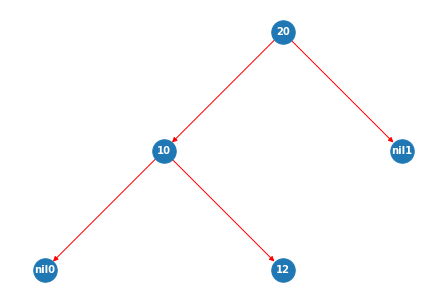

In [ ]:
claves = [10, 12, 20]
frec = [34, 8, 50]
n = len(claves)
verbose = True

print("COSTO MINIMO:", BST_recursivo(frec,0, n-1, verbose))
print("LLAMADAS: ",llamadas)
print("\n")
llamadas = 0

T = nx.DiGraph()
generar_bst(T,claves)
pos = graphviz_layout(T, prog="dot")
nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width= 1.0, edge_color ="red")
null_node = 0

### Forma Dinamica

In [ ]:
def BST(n):

    clave = sorted(random.sample(range(1, 100), n))
    arreglo = np.random.random(n*2+1)
    arreglo /= arreglo.sum()
    
    p = list(arreglo[:n]) 
    q = arreglo[n:] 
    return claves, p, q


cont = 0
def BST_dinamico(claves,frec,n,verbose):

  costo = [[0 for x in range(n)] for y in range(n)]                            
  global cont

  for i in range(n):                                                            
    costo[i][i] = frec[i]

  for l in range(2,n+1):
    for i in range(n - l+1):
      j = i + l - 1

      if verbose:
        print("-> CÁLCULO DE LAS FRECUENCIAS")
      suma = 0
      for k in range(i, j+1):                                                   
        suma += frec[k]

      if verbose:
        print("SUMA DE LAS FRECUANCIAS:",suma)

      if i >= n or j >=n:                                                       
        break
      costo[i][j] = float("inf")                                                

      for r in range(i,j+1):                                                    
        if verbose:
          print("-> BUSCANDO VALORES OPTIMOS")
        cont += 1
        aux = 0
        if r > i:
          if verbose:
            print(f"COMPARAMOS {r} - {i}")
          aux += costo[i][r-1]
          if verbose:
            print("COSTO MINIMO:", aux)
        if r < j:
          if verbose:
            print(f"COMPARAMOS {r+1} - {j}")
          aux += costo[r+1][j]
        aux += suma
        if verbose:
          print("NUEVO COSTO:" ,aux)
        if aux < costo[i][j]:
          costo[i][j] = aux

        if verbose:
          print("COSTO MINIMO:",costo[0][n-1])
          print("\n")

  return costo[0][n-1]

-> CÁLCULO DE LAS FRECUENCIAS
SUMA DE LAS FRECUANCIAS: 42
-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 1 - 1
NUEVO COSTO: 50
COSTO MINIMO: 0


-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 1 - 0
COSTO MINIMO: 34
NUEVO COSTO: 76
COSTO MINIMO: 0


-> CÁLCULO DE LAS FRECUENCIAS
SUMA DE LAS FRECUANCIAS: 58
-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 2 - 2
NUEVO COSTO: 108
COSTO MINIMO: 0


-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 2 - 1
COSTO MINIMO: 8
NUEVO COSTO: 66
COSTO MINIMO: 0


-> CÁLCULO DE LAS FRECUENCIAS
SUMA DE LAS FRECUANCIAS: 92
-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 1 - 2
NUEVO COSTO: 158
COSTO MINIMO: 158


-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 1 - 0
COSTO MINIMO: 34
COMPARAMOS 2 - 2
NUEVO COSTO: 176
COSTO MINIMO: 158


-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 2 - 0
COSTO MINIMO: 50
NUEVO COSTO: 142
COSTO MINIMO: 142


COSTO : 142
LLAMADAS : 7 




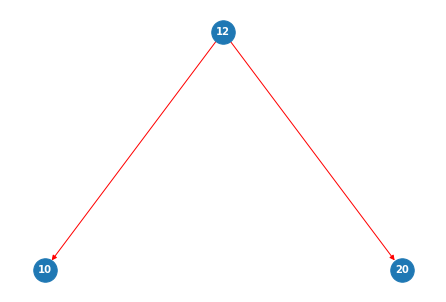

In [ ]:
claves = [10, 12, 20]
frec = [34, 8, 50]
n = len(claves)
verbose = True

print(f"COSTO : {BST_dinamico(claves, frec, n, verbose)}")
print(f"LLAMADAS : {cont} " )
print("\n")
cont = 0

T = nx.DiGraph()
generar_bst(T,claves)

pos = graphviz_layout(T, prog="dot")

nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="red")
null_node = 0
     

#2.2 Descripcion del Algoritmo:

El objetivo es contruir un arbol que minimice el costo total de busqueda. No pretende conseguir un altura minima y tampoco es necasario que el padre del subarbol sea mayor que sus hijos.

Considere la secuencia de $n$ claves $K = [ k_1, k_2, k_3, …, k_n]$ de distinta probabilidad en orden ordenado tal que $k_1< k_2< … < k_n $. Los elementos entre cada par de claves conducen a una **búsqueda fallida**, por lo que para $n$ claves, el árbol de búsqueda binaria contiene $n + 1$ claves ficticias $d_i$, que representan búsquedas fallidas.

El coste corresponde al promedio de nodos que se debe visitar en una búsqueda. El coste de cada clave tiene directa relación con su nivel en el árbol.

**Coste por busqueda para un nodo $i$ esta dado por**: 

* $cost(k_i) = depth(k_i)+1$
 
**Y el coste de la busqueda en un BST (funcion que buscamos minimizar) se define:**  

* $\sum\limits_{i=1}^n (depth(k_i)+1)p_i$



# 3. Tiempo de ejecucion: 

### **3.1 FORMA RECURSIVA**
▹ La complejidad del algoritmo de forma recursiva corresponde a $O(2^n)$

$$T(n) = \sum_{i=0}^{n-1}T(i)+n ≥ T(n-1) + T(n-2) ≥ F(n)$$

▹ Este algoritmo se comporta parecido a la función Fibonacci, por lo que podemos demostrar que corresponde $T(n) = (2^{0(n)}) = O(2^n)$.

### **3.2 ACERCAMIENTO BOTTOM-UP**

▹ Como podemos observar en el código mostrado anteriormente, al observar existen 3 ciclos for anidados, por lo que la complejidad corresponde a $O(n^3)$. Para demostralo lo podemos calcular de la siguiente manera:

$$T(n) = \sum_{m=1}^{n} \sum_{i=1}^{n-m+1} \sum_{j=i}^{n-l} Θ(l)$$
$$     = \sum_{m=1}^{n} \sum_{i=1}^{n-m+1}n =\sum_{m=1}^{n}n^2$$
$$     = Θ(n^3)$$


# 4. Correctitud
 Supongamos que se nos da una lista de claves $k1 < k2 < . . . < k_n$, y una lista de probabilidades $p_i$ que cada llave sea buscada. Un árbol de búsqueda binario óptimo es un $BST T$ que minimiza la búsqueda esperada tiempo.

$$\sum\limits_{i=1}^n p_i(depth_T(k_i)+1)$$

donde la profundidad de la raíz es 0. Supondremos que las claves son los números $1, 2, . . . , n$. Mediante el uso programación dinámica, sin embargo, podemos resolver el problema de manera eficiente.

Primero calcular el valor numérico del tiempo de búsqueda esperado para un BST óptimo, y luego consideraremos cómo modificar nuestra solución para encontrar el BST correspondiente. Sea $1 ≤ i ≤ j ≤ n$, y sea $T$ cualquier $BST$ en $i, . . . , J$. Definiremos el costo de $T$:

$$C(T) = \sum\limits_{l=i}^j p_l(depth_T(l)+1)$$

y los subproblemas:

$$C_{ij} = min_\text{T on i,...,j} C(T)$$


El tiempo de búsqueda esperado para el $BST$ óptimo es $C_{1n}$.

El costo de $T$ es: 

$$C(T_L) + C(T_R) + \sum\limits_{l=i}^j p_l$$

Y así definimos la recurrencia $C'_{ij}$:

$C'_{ij} =  \begin{cases}
    min_{i \leq k \leq j}\{C'_{i, k-1} + C'_{k+1, j}\}+\sum\limits_{l=i}^{j} p_l, & \text{if $i < j$}.\\
    p_i, & \text{if $i = j$}.\\
    0, & \text{if $i > j$}
  \end{cases}$

Se pretende que: $C'_{ij} = C_{ij}$

La demostración se hace por inducción en $j − i$, el caso base es trivial.

$C'_{ij} ≥ C_{ij}$, según el cálculo anterior $C'_{ij}$ es el costo de algunos BST en $i,....,j$ y $C_{ij}$ es el costo de un BST óptimo.

$C'_{ij} ≤ C_{ij}$, supongamos que la raíz de la BST óptima es $k$. 

Entonces:

$$C_{ij} = C_{i, k-1} + C_{k+1, j} + \sum\limits_{l=i}^{j} p_l$$

$$≥ C'_{i, k-1} + C'_{k+1, j} + \sum\limits_{l=i}^{j} p_l$$

$$≥ min_{i \leq k \leq j}\{C'_{i, k-1} + C'_{k+1, j}\} + \sum\limits_{l=i}^{j} p_l = C'_{ij}$$

## Experimentos